# SIR model

#SUSCEPTIBLE TO INFECTED


In [11]:
# contact rate - how often do susceptable ppl come in contact

In [12]:
# risk of infection -during one of those interactions what is chance of spreading the disease?


In [13]:
#for eg if I meet 3 people every day and spread disease with a rate of 50%

In [14]:
# 3*0.5

In [15]:
#1.5 people are infected every day also known as effective contact rate=contact rate* risk of infection

aka moving from susceptible to infected

In [17]:
#INFECTED TO REMOVED

In [18]:
#2 ways to move from infected to removed
#1 people recover
#2 people die

In [19]:
#removal rate  =1/recovery period
# if we have 200 people on day 10 and recovery period is 1o days

In [20]:
# 200*(1/10)

In [21]:
#=20 people removed

# WHAT IS R0 - basic reproductive rate the measure of average multiplication of a disease

In [23]:
# R0 = effective contact rate/removal rate

In [24]:
# therefore if effective contact rate is 1.5 and removal rate is 1/10
# R0 = 1.5/0.1=15(very severe)

In [25]:
#if R0>1 disease will spread

In [ ]:
#if R0<1 disease will die out

https://rssdss.design.blog/2020/03/31/all-models-are-wrong-but-some-are-completely-wrong/

#assumption that epidemic is short

#assumption rate of increase in infectives is proportional to contact between susceptible and infected

#infective recover die at constant rate

I=infected
S=susceptable
R=removed
r=rate of infection
ds/dt=-rIS(rate of contact,infected,susceptibles)

dI/dt=rIS-aI(infected are being removed)
dR/dt=aI
Initially 
S=S’
I=I’
R=0


S<S’(for spread)
dI/dt<I(rS’-a)
If S’>a/r (disease will spread)
r/a = q(contact ratio -number of people which come in contact with infected population)
R0=rS’/a(basic reproductive number)>1(for disease to spread(R0 is 3-4 for COVID 19))


What would be the maximum number of people affected?
dI/dS=(rIS-aI)/-rIS = -1+a/rS=-1+1/qs
I+S-1/q(LogN(S))=I’+S’-1/q(LogN(S’))
dI/dS=0 if S=1/q
Imax =I’+S’-1(1+LogN(qS’))/q
plotting -(1/q)(1+LogN(qS'))

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [7]:
x = np.array(range(1,10000))

In [8]:
y = (1+np.log(x))/x

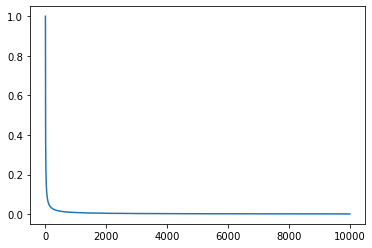

In [9]:
plt.plot(x,y)

Plotting 1(1+LogN(qS’))/q 
We see that this value decreases to zero that means maximum people infected can be almost all the people. This happens with new diseases such as COVID for whom the popultation has no Immunity and every one is susceptible.


To reduce total number of people catching the disease we need to make value of 1(1+LogN(qS’))/q  as large as possible that implies we have to make q or contact ratio as small as possible

# Model

In [10]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [6]:
# The SIR model differential equations.
def deriv(state, t, N, beta, gamma):
    S, I, R = state
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in I population over time
    dIdt = beta * S * I / N - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

R0 is 3.0


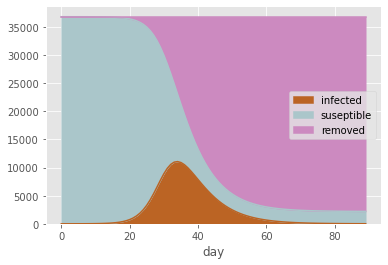

In [16]:
#mean recovery period of covid is 6 days
recovery_rate = 1/6
#contact ratio with no lockdown
effective_contact_rate = 0.5
print("R0 is", effective_contact_rate / recovery_rate) #R0 for India in first months
#analysis would be for Kerala one of the first states to expirence covid
#popuplation 3.68 crore is dialed down to 36.8 thousand for computation purposes
total_pop = 36800
recovered = 0
infected = 1
susceptible = total_pop - infected - recovered
# A list of days, 0-90 or 3 months
days = range(0, 90)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, infected, recovered],
             days,
             args=(total_pop, effective_contact_rate, recovery_rate))
S, I, R = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'infected': I,
    'removed': R,
    'day': days
})

plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'suseptible', 'removed'],
        color=['#bb6424', '#aac6ca', '#cc8ac0'],
        kind='area',
        stacked=True)


In [17]:
#above graph does not take into account the lockdown imposed the lockdown would have decreased the effective contact ratio 
#and thus the spread
#let
effective_contact_rate = 0.31

R0 is 1.86


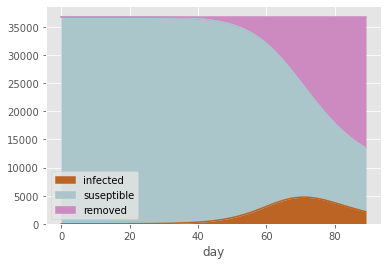

In [19]:
#mean recovery period of covid is 6 days
recovery_rate = 1/6
#contact ratio with no lockdown
effective_contact_rate = 0.31
print("R0 is", effective_contact_rate / recovery_rate) #R0 for India in first months
#analysis would be for Kerala one of the first states to expirence covid
#popuplation 3.68 crore is dialed down to 36.8 thousand for computation purposes
total_pop = 36800
recovered = 0
infected = 1
susceptible = total_pop - infected - recovered
# A list of days, 0-90 or 3 months
days = range(0, 90)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, infected, recovered],
             days,
             args=(total_pop, effective_contact_rate, recovery_rate))
S, I, R = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'infected': I,
    'removed': R,
    'day': days
})

plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'suseptible', 'removed'],
        color=['#bb6424', '#aac6ca', '#cc8ac0'],
        kind='area',
        stacked=True)

As u can see the 2 different approaches to tackle covid while imosing a lockdown reduces the number of eventually infected people but the peak comes late(70 days) as compared to no lockdown(30 days)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array(range(1,23))

In [3]:
y =  np.power((1-(1/x)),1/2)

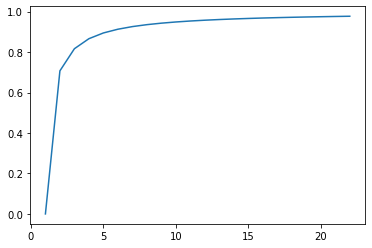

In [4]:
plt.plot(x,y)

In [22]:
def deriv(state, t, N, beta, gamma):
    S, I, R = state
    ui1=I*S*((beta*(S-I)/N)-gamma)
    ui2=1-((beta/N)*5*(I-S))
    uif=ui1/ui2
    dSdt =(-beta * S * I / N)-(beta*5*uif/N)
    dIdt = (beta * S * I / N) - (gamma * I)+((beta/N)*5*uif)
    # Change in R population over time
    dRdt = gamma * I
    return dSdt, dIdt, dRdt
    

R0 is 3.0


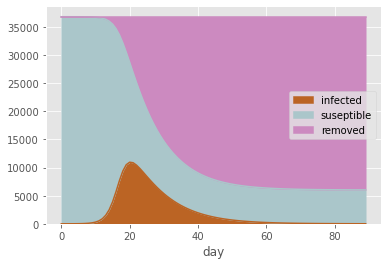

In [23]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
#mean recovery period of covid is 6 days
recovery_rate = 1/6
#contact ratio with no lockdown
effective_contact_rate = 0.5
print("R0 is", effective_contact_rate / recovery_rate) #R0 for India in first months
#analysis would be for Kerala one of the first states to expirence covid
#popuplation 3.68 crore is dialed down to 36.8 thousand for computation purposes
total_pop = 36800
recovered = 0
infected = 1
susceptible = total_pop - infected - recovered
# A list of days, 0-90 or 3 months
days = range(0, 90)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, infected, recovered],
             days,
             args=(total_pop, effective_contact_rate, recovery_rate))
S, I, R = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'infected': I,
    'removed': R,
    'day': days
})

plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'suseptible', 'removed'],
        color=['#bb6424', '#aac6ca', '#cc8ac0'],
        kind='area',
        stacked=True)


We see that the shape of our graph is retained as
the first time we made it but it has just shifted a little
-It shows us that incubation period makes it difficult
For people to quarantine themselves or remove 
themselves. So it makes for a sharper peak and an early peak since
infected people remain in popluation for a long time.
